In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
import numpy as np

train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e20/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e20/test.csv")

In [2]:
pd.set_option('display.max_columns',None)
train_df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                                 NaN                                 NaN   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   
2                          23.206415   
3                                NaN   
4                          24.331972   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   
2                                       0.000154   
3                                            NaN   
4                                      -0.000028   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   
2                                 0.035338   
3                                 0.036790   
4                                 0.034675   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   
2                               2703.236800                  2809.138386   
3                               2076.073332                  3917.707873   
4                               2053.608490                  2667.310013   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   829530.500000                            71.111977   
1                   829787.287130                            -1.019594   
2                   829883.828686                           -54.801144   
3                   829657.163571                            28.916541   
4                   829735.093750                           -12.501663   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [3]:
pd.set_option('display.max_columns',None)
test_df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                            NaN                                  NaN   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                                 NaN                                 NaN   
1                           15.600607                         -140.529848   
2                           39.889060                         -136.908976   
3                           58.862543                         -152.999440   
4                           15.646016                         -135.794754   

   SulphurDioxide_solar_zenith_angle  \
0                                NaN   
1                          28.896124   
2                          30.054682   
3                          21.806625   
4                          24.328299   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                            NaN   
1                                       0.000157   
2                                       0.000053   
3                                       0.000093   
4                                      -0.000077   

   CarbonMonoxide_CO_column_number_density  \
0                                      NaN   
1                                 0.037641   
2                                 0.037795   
3                                 0.039743   
4                                 0.039232   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                       NaN                          NaN   
1                               1688.656342                  2814.309683   
2                               2629.692089                  3233.654973   
3                               1905.403107                  3157.021515   
4                               1307.190702                  2228.402754   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                             NaN                                  NaN   
1                   829652.957598                            26.072167   
2                   829589.971617                            14.881259   
3                   829691.671875                           -12.772312   
4                   829847.718216                           -40.978057   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [4]:
pd.set_option('display.max_columns',None)
train_df.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      79023  79023.000000  79023.000000  79023.000000   
unique                     79023           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.891072     29.880155   2020.000000   
std                          NaN      0.694522      0.810375      0.816502   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.451000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.883000   2020.000000   
75%                          NaN     -1.303000     30.471000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   79023.000000                              64414.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.000000                                  0.000048   
std        15.297155                                  0.000272   
min         0.000000                                 -0.000996   
25%        13.000000                                 -0.000096   
50%        26.000000                                  0.000024   
75%        39.000000                                  0.000153   
max        52.000000                                  0.004191   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   64414.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.834848   
std                                         0.185382   
min                                         0.241822   
25%                                         0.705817   
50%                                         0.809118   
75%                                         0.942792   
max                                         1.885239   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     64414.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000035   
std                                           0.000206   
min                                          -0.000887   
25%                                          -0.000078   
50%                                           0.000019   
75%                                           0.000121   
max                                           0.004236   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    64414.000000                         64414.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.158418                            -7.925870   
std                          0.071364                            64.263368   
min                          0.000000                          -179.537059   
25%                          0.110535                           -56.782383   
50%                          0.161855                           -12.441726   
75%                          0.211824                            72.059990   
max                          0.299998                 

In [5]:
pd.set_option('display.max_columns',None)
test_df.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude     year  \
count                      24353  24353.000000  24353.000000  24353.0   
unique                     24353           NaN           NaN      NaN   
top     ID_-0.510_29.290_2022_00           NaN           NaN      NaN   
freq                           1           NaN           NaN      NaN   
mean                         NaN     -1.891072     29.880155   2022.0   
std                          NaN      0.694532      0.810387      0.0   
min                          NaN     -3.299000     28.228000   2022.0   
25%                          NaN     -2.451000     29.262000   2022.0   
50%                          NaN     -1.882000     29.883000   2022.0   
75%                          NaN     -1.303000     30.471000   2022.0   
max                          NaN     -0.510000     31.532000   2022.0   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   24353.000000                              18211.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       24.000000                                  0.000014   
std        14.142426                                  0.000234   
min         0.000000                                 -0.000977   
25%        12.000000                                 -0.000122   
50%        24.000000                                  0.000007   
75%        36.000000                                  0.000137   
max        48.000000                                  0.004110   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   18211.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.792570   
std                                         0.168043   
min                                         0.339845   
25%                                         0.678384   
50%                                         0.763307   
75%                                         0.872586   
max                                         1.696826   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     18211.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000009   
std                                           0.000170   
min                                          -0.000775   
25%                                          -0.000094   
50%                                           0.000004   
75%                                           0.000104   
max                                           0.002701   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    18211.000000                         18211.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.139218                             9.298052   
std                          0.079865                            67.148199   
min                          0.000000                          -106.809900   
25%                          0.078934                           -41.627297   
50%                          0.138999                            16.857963   
75%                          0.200819                            73.664560   
max                          0.299973                           157.503026   

        SulphurDioxide_sensor_zenit

In [6]:
pd.set_option('display.max_rows',None)
train_df.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                            0
latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMono

In [7]:
pd.set_option('display.max_rows',None)
test_df.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                            0
latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                     6142
SulphurDioxide_SO2_column_number_density_amf                 6142
SulphurDioxide_SO2_slant_column_number_density               6142
SulphurDioxide_cloud_fraction                                6142
SulphurDioxide_sensor_azimuth_angle                          6142
SulphurDioxide_sensor_zenith_angle                           6142
SulphurDioxide_solar_azimuth_angle                           6142
SulphurDioxide_solar_zenith_angle                            6142
SulphurDioxide_SO2_column_number_density_15km                6142
CarbonMonoxide_CO_column_number_density                      1337
CarbonMono

In [8]:
test_df.dtypes

ID_LAT_LON_YEAR_WEEK                                         object
latitude                                                    float64
longitude                                                   float64
year                                                          int64
week_no                                                       int64
SulphurDioxide_SO2_column_number_density                    float64
SulphurDioxide_SO2_column_number_density_amf                float64
SulphurDioxide_SO2_slant_column_number_density              float64
SulphurDioxide_cloud_fraction                               float64
SulphurDioxide_sensor_azimuth_angle                         float64
SulphurDioxide_sensor_zenith_angle                          float64
SulphurDioxide_solar_azimuth_angle                          float64
SulphurDioxide_solar_zenith_angle                           float64
SulphurDioxide_SO2_column_number_density_15km               float64
CarbonMonoxide_CO_column_number_density         

In [9]:
train_df.dtypes

ID_LAT_LON_YEAR_WEEK                                         object
latitude                                                    float64
longitude                                                   float64
year                                                          int64
week_no                                                       int64
SulphurDioxide_SO2_column_number_density                    float64
SulphurDioxide_SO2_column_number_density_amf                float64
SulphurDioxide_SO2_slant_column_number_density              float64
SulphurDioxide_cloud_fraction                               float64
SulphurDioxide_sensor_azimuth_angle                         float64
SulphurDioxide_sensor_zenith_angle                          float64
SulphurDioxide_solar_azimuth_angle                          float64
SulphurDioxide_solar_zenith_angle                           float64
SulphurDioxide_SO2_column_number_density_15km               float64
CarbonMonoxide_CO_column_number_density         

Some values are missing and should be imputed. UVAerosolLayerHeight related features will be dropped, as they have to many missing values in both sets.

In [10]:
train_df.drop(columns=['UvAerosolLayerHeight_aerosol_height','UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth','UvAerosolLayerHeight_sensor_zenith_angle','UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_solar_azimuth_angle','UvAerosolLayerHeight_solar_zenith_angle'], inplace=True)
test_df.drop(columns=['UvAerosolLayerHeight_aerosol_height','UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth','UvAerosolLayerHeight_sensor_zenith_angle','UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_solar_azimuth_angle','UvAerosolLayerHeight_solar_zenith_angle'], inplace=True)

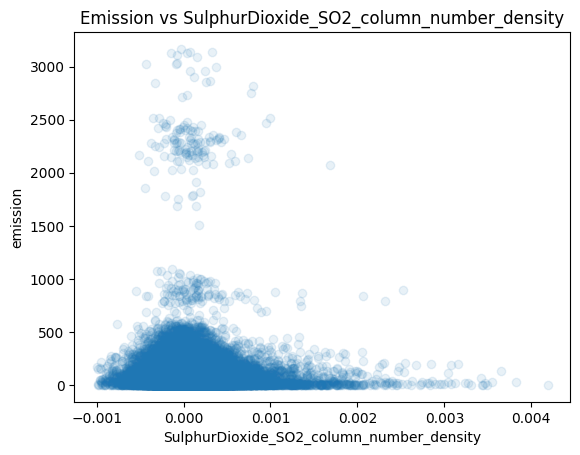

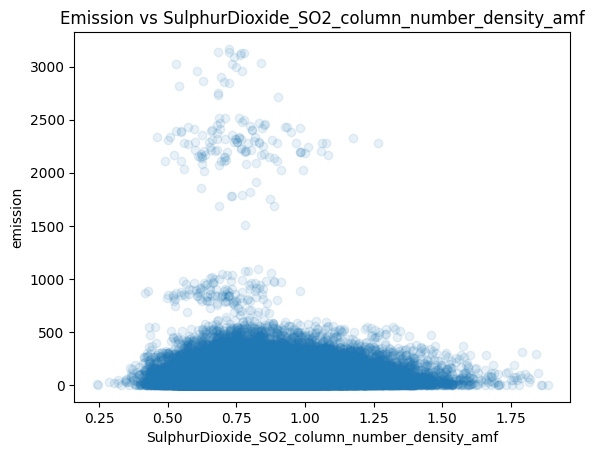

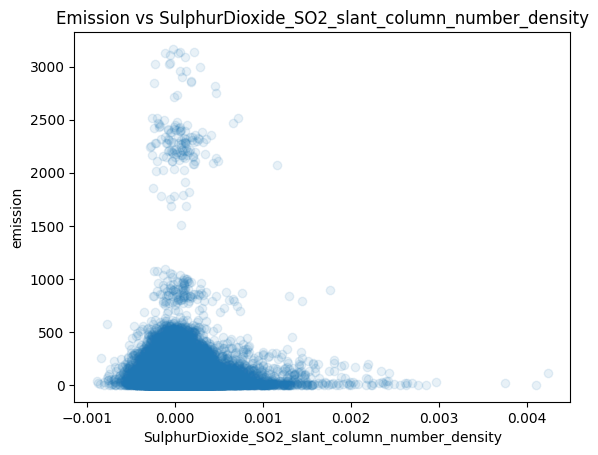

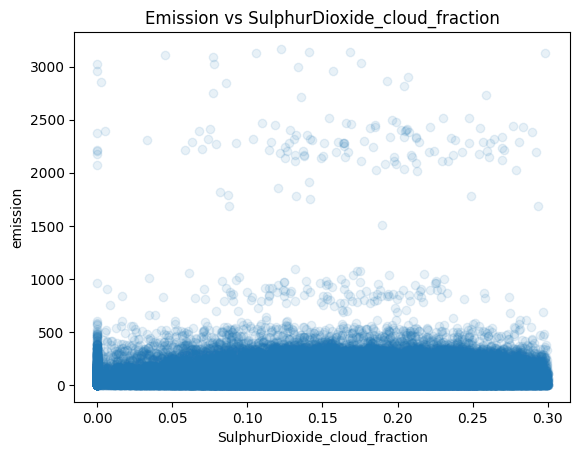

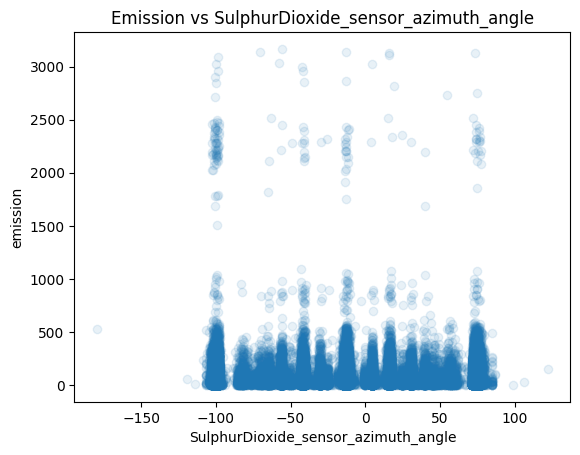

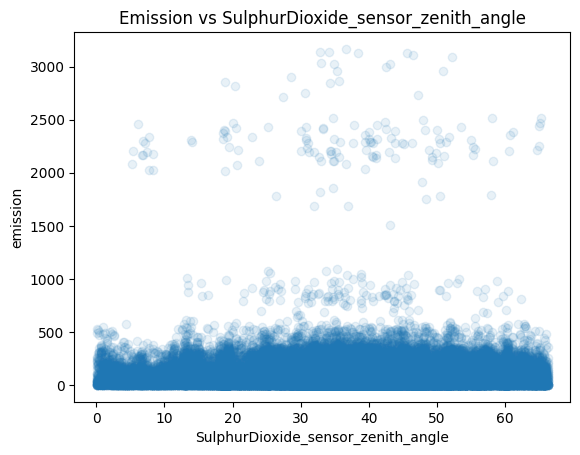

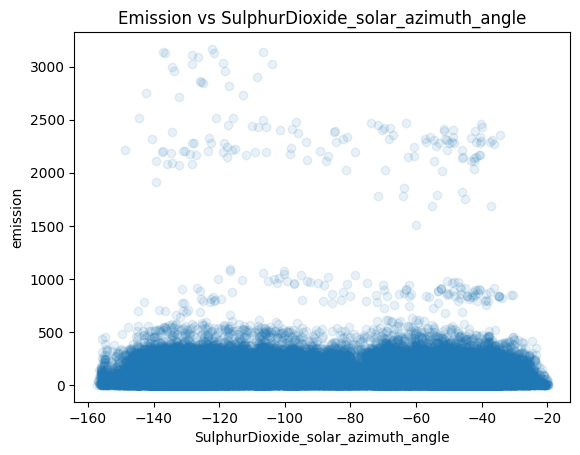

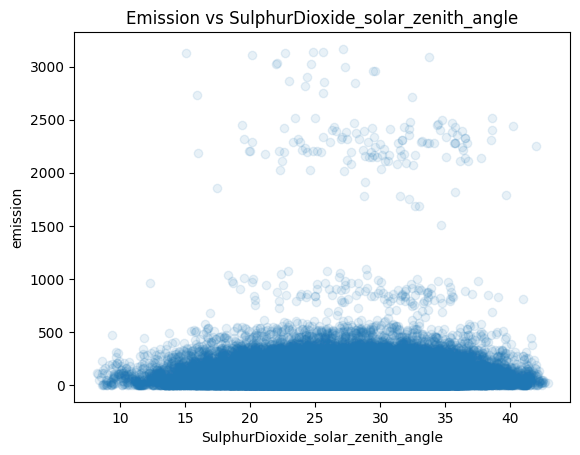

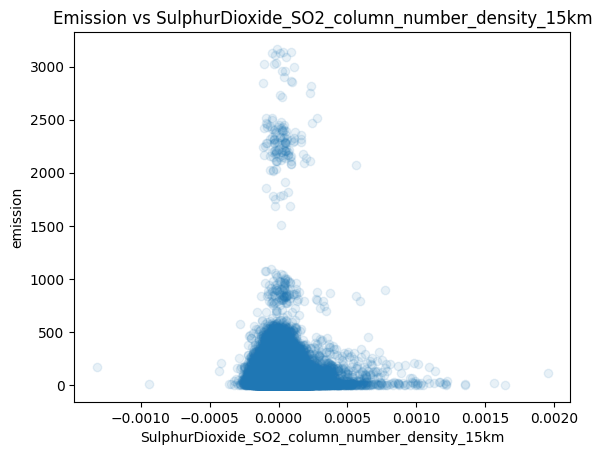

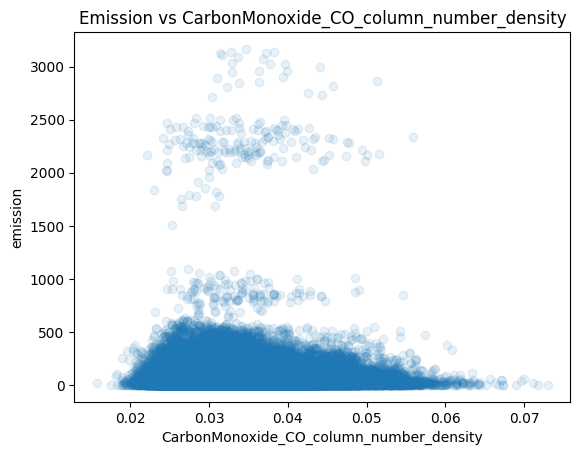

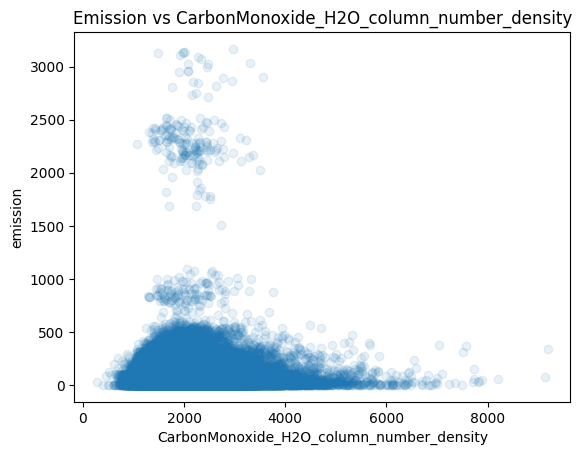

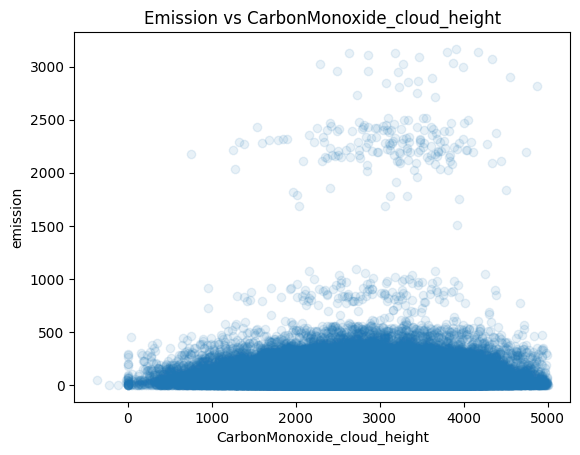

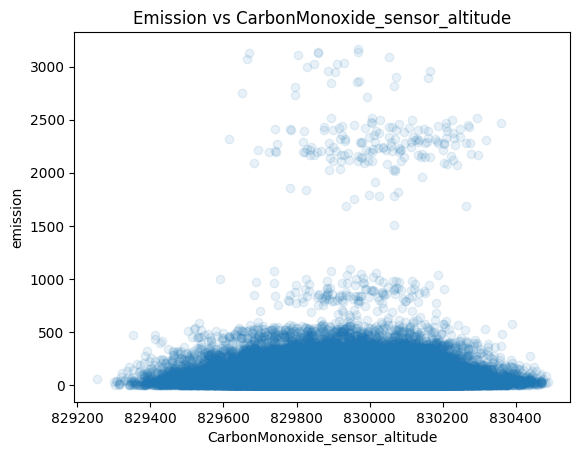

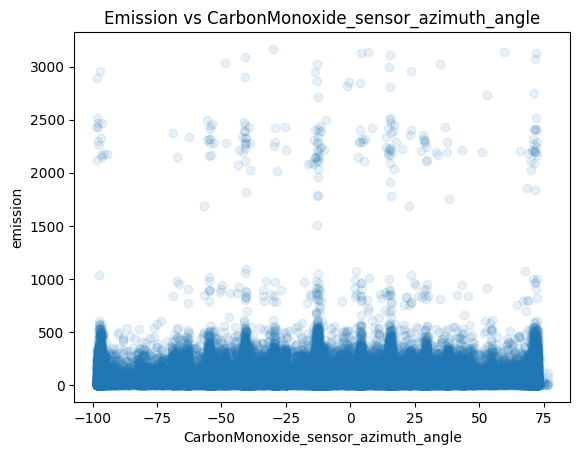

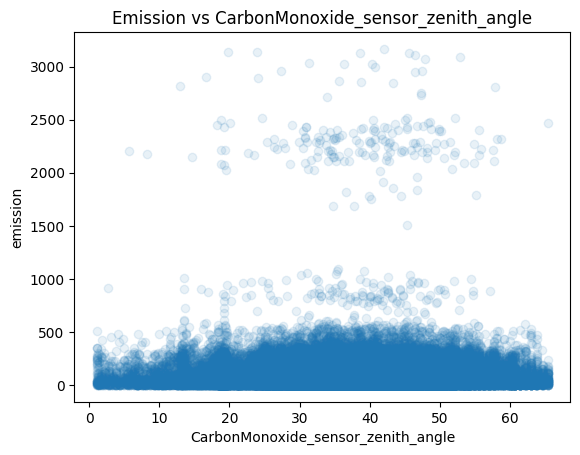

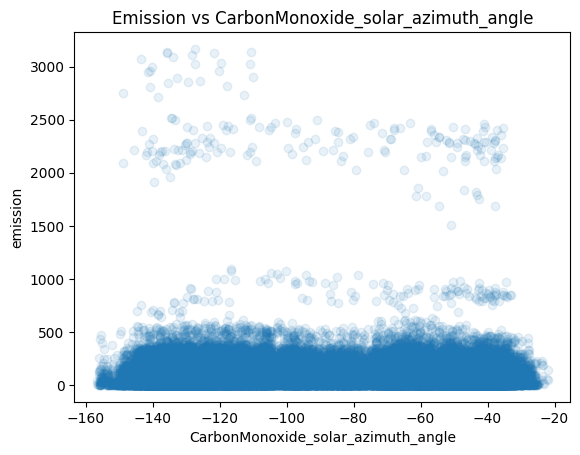

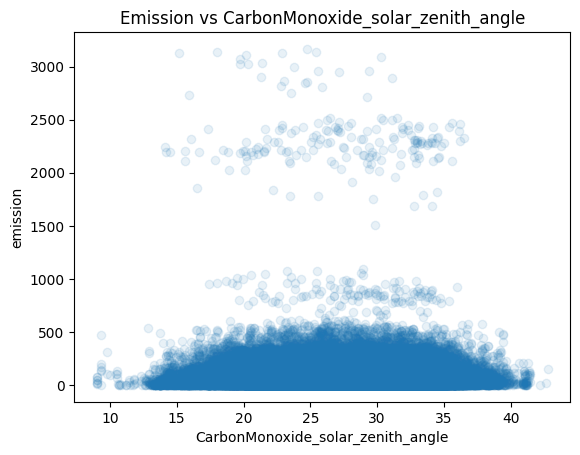

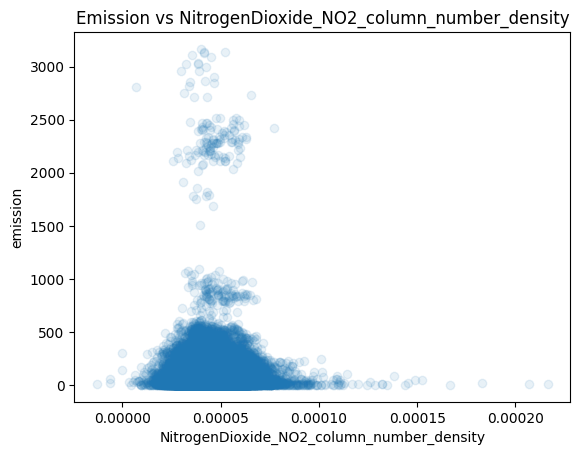

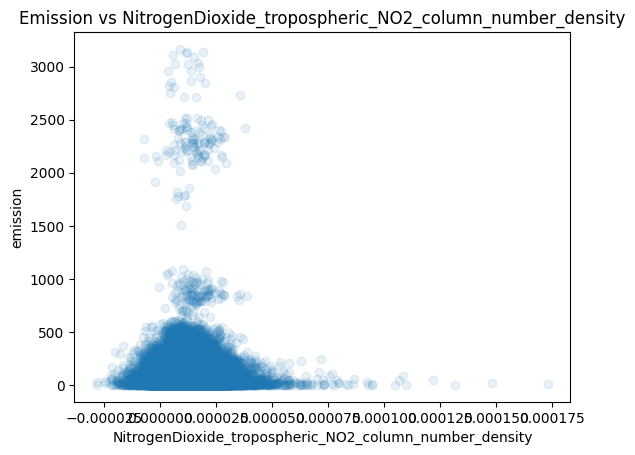

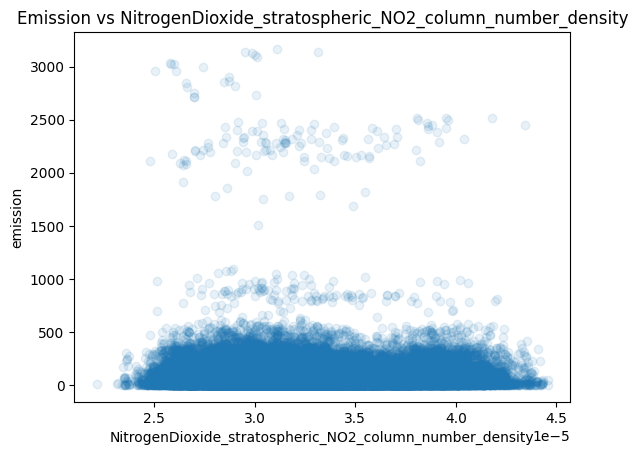

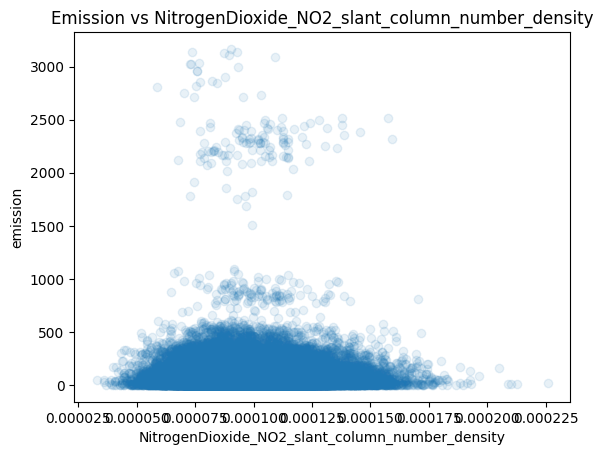

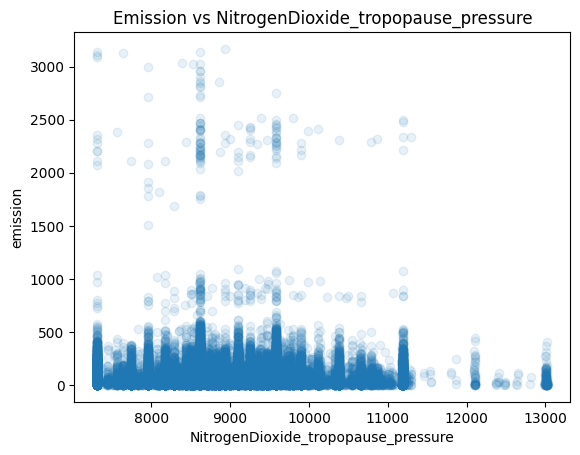

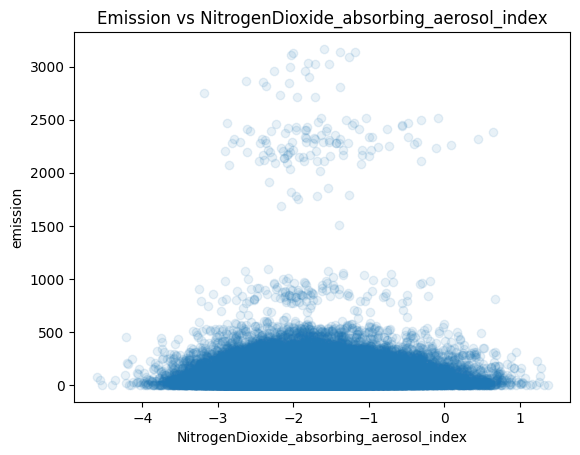

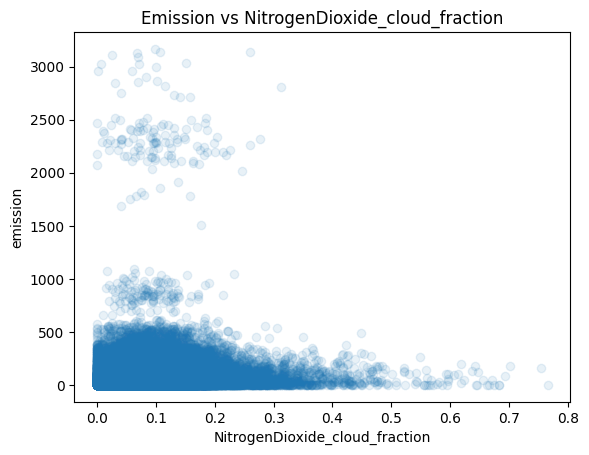

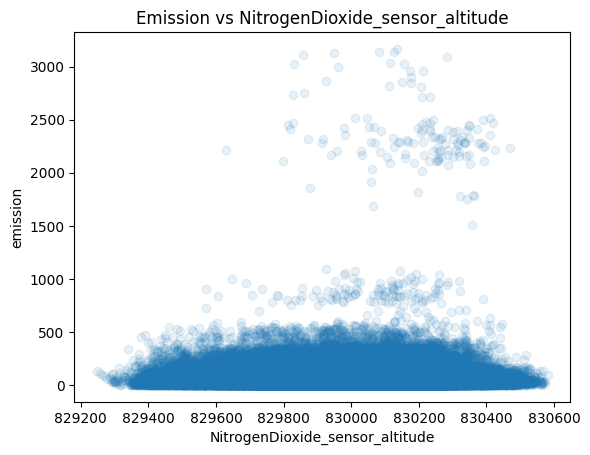

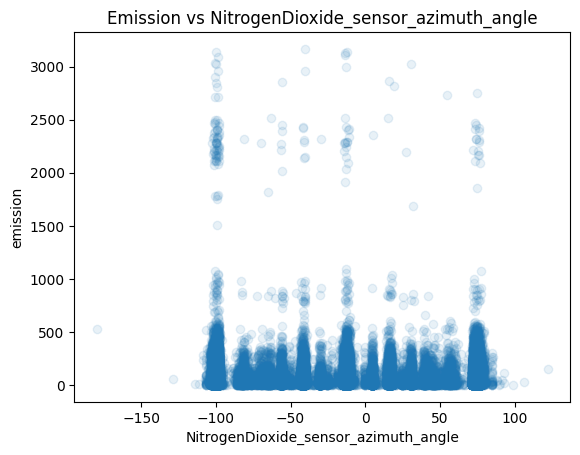

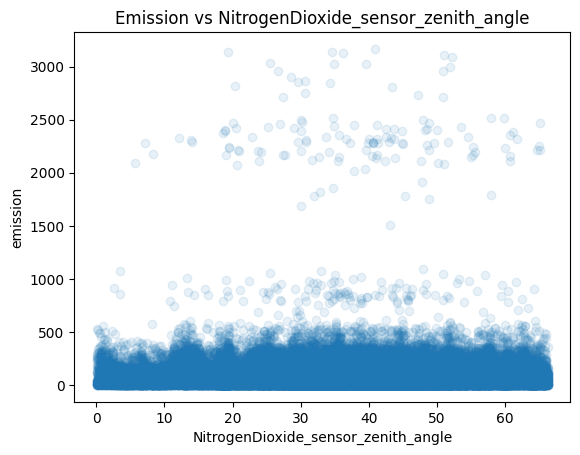

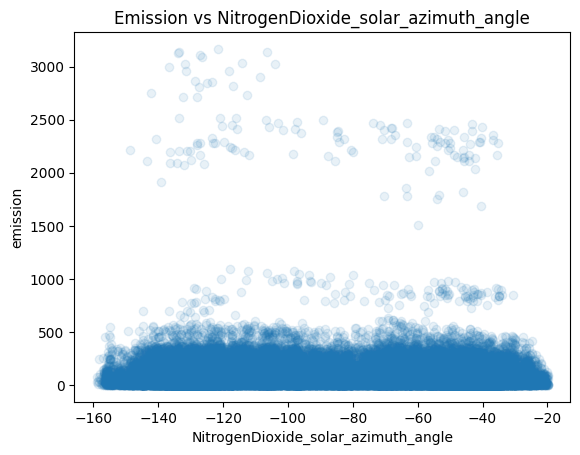

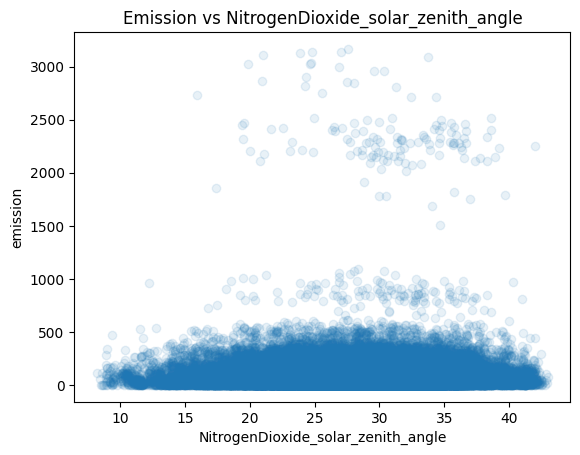

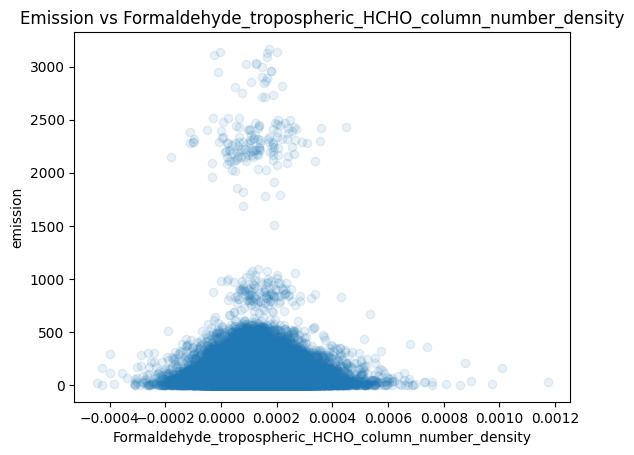

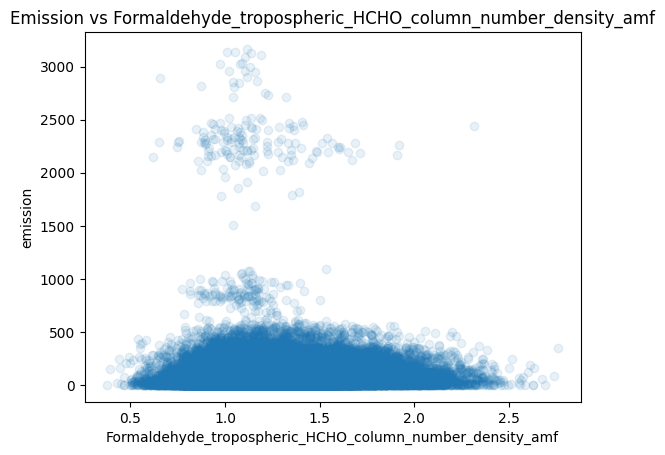

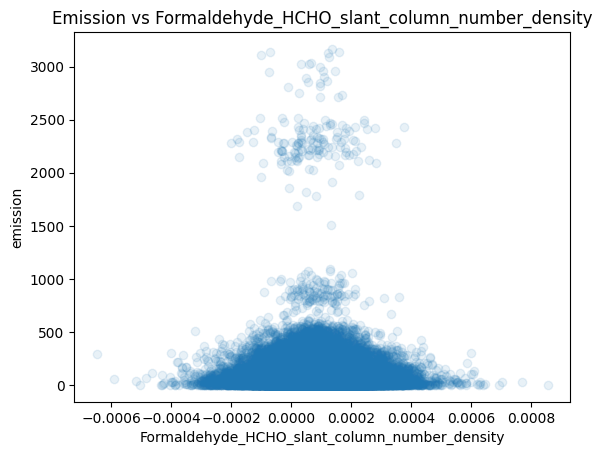

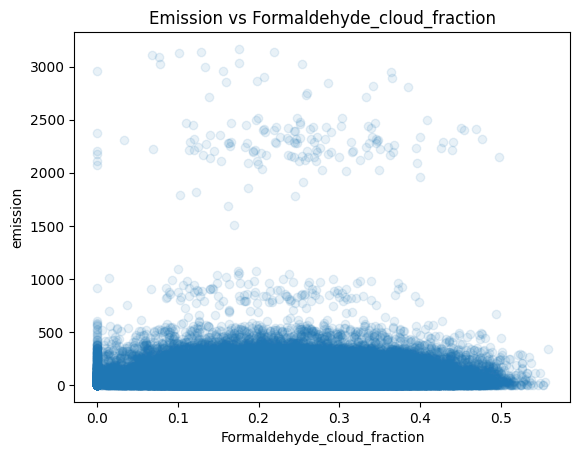

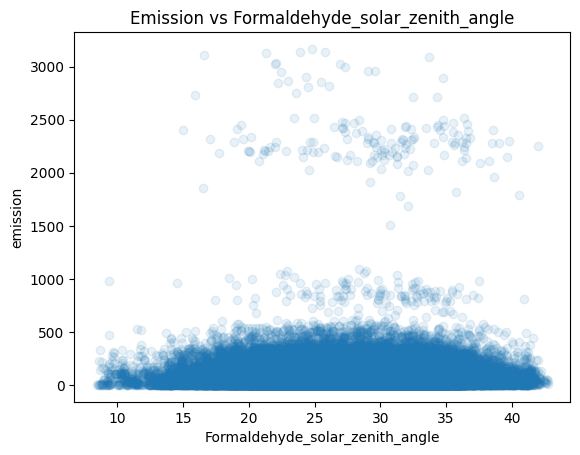

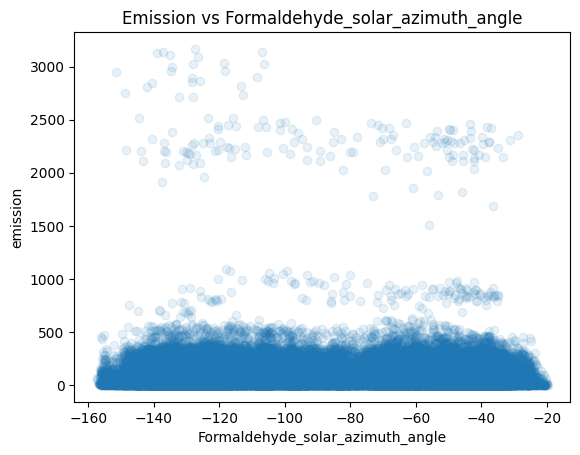

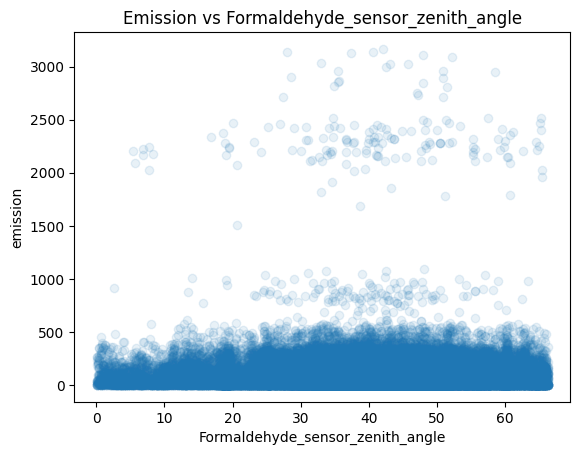

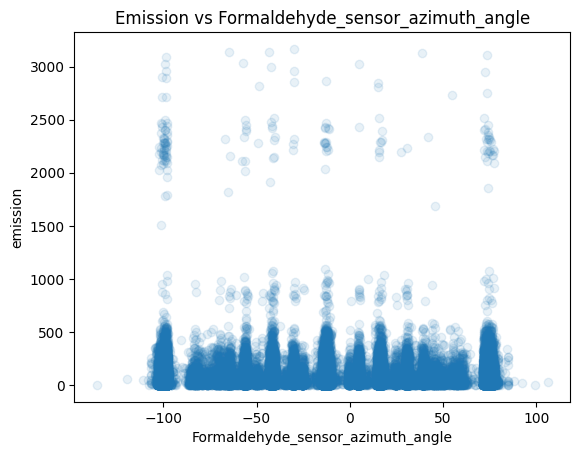

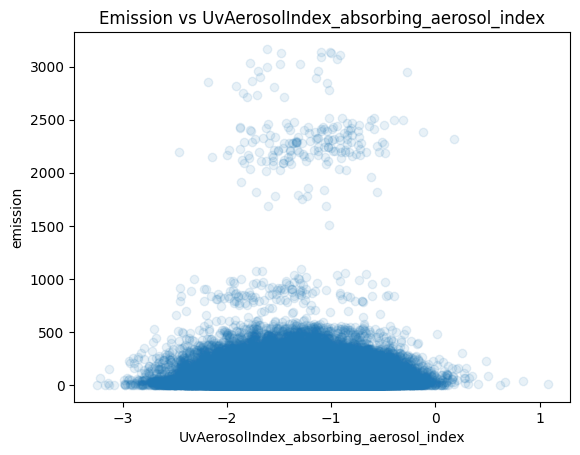

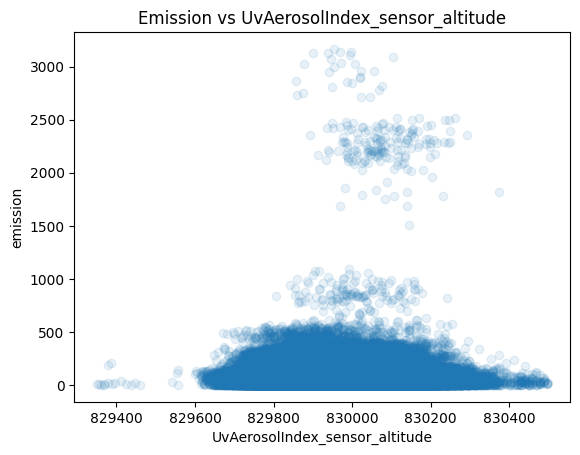

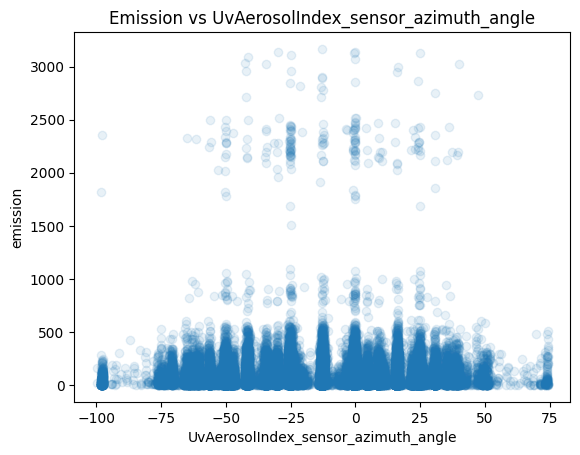

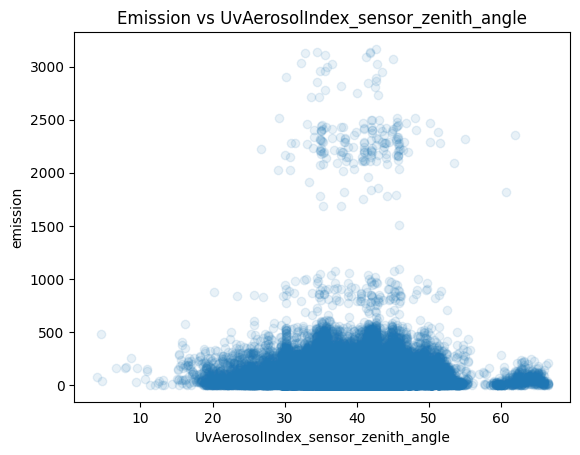

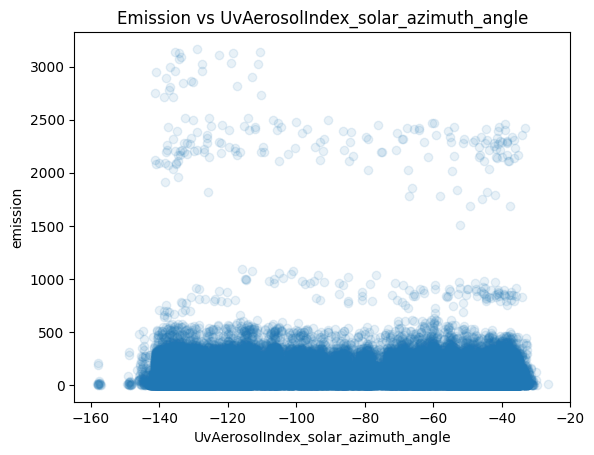

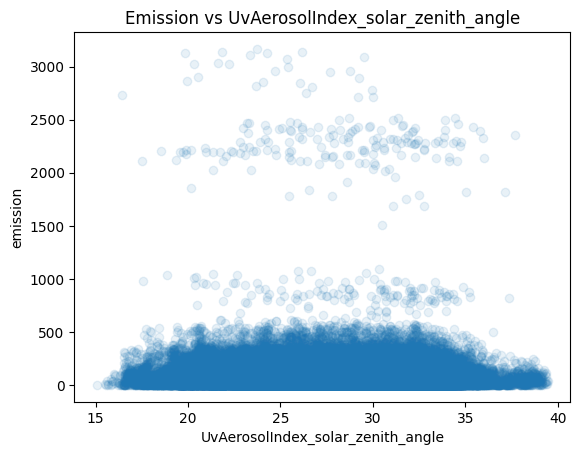

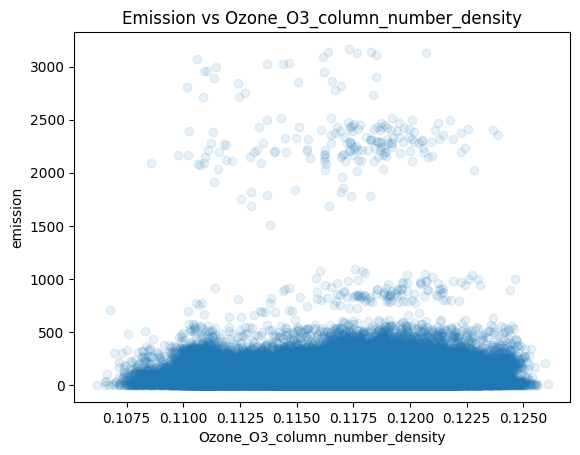

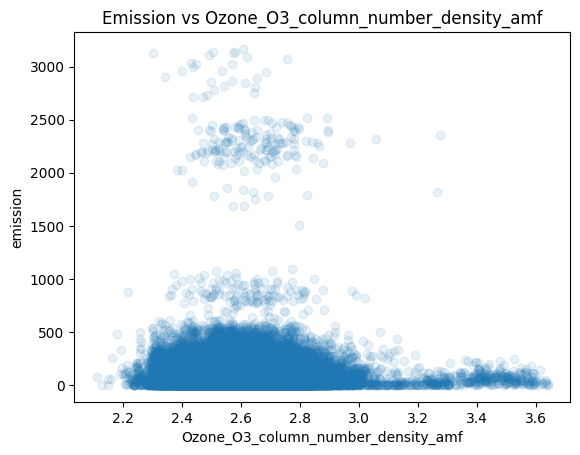

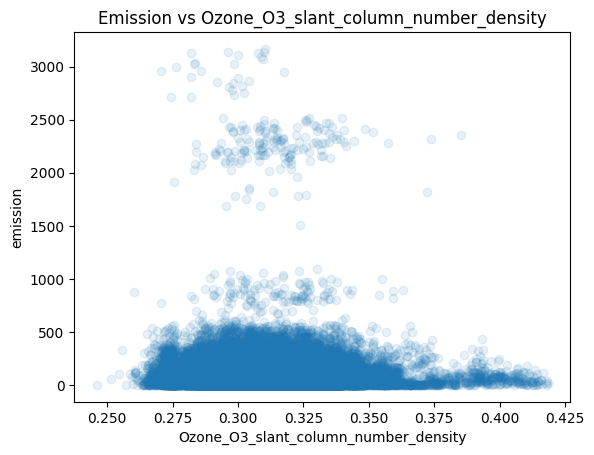

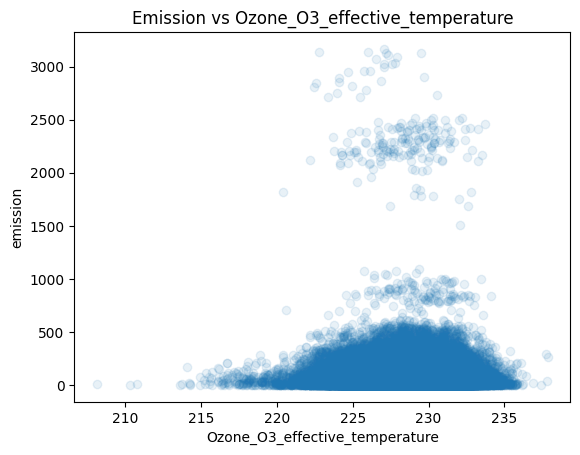

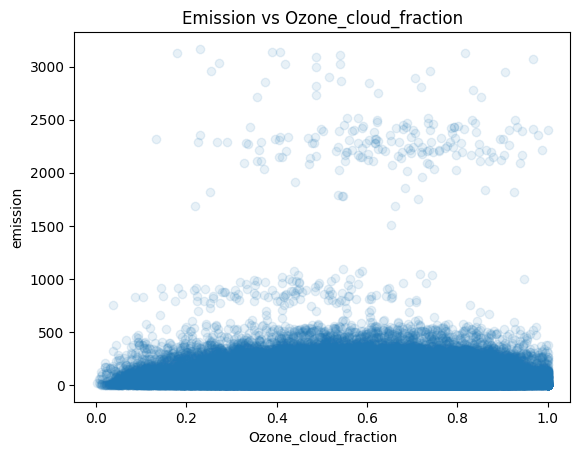

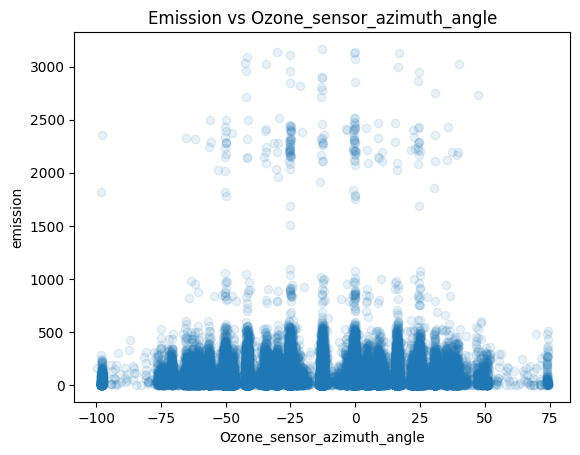

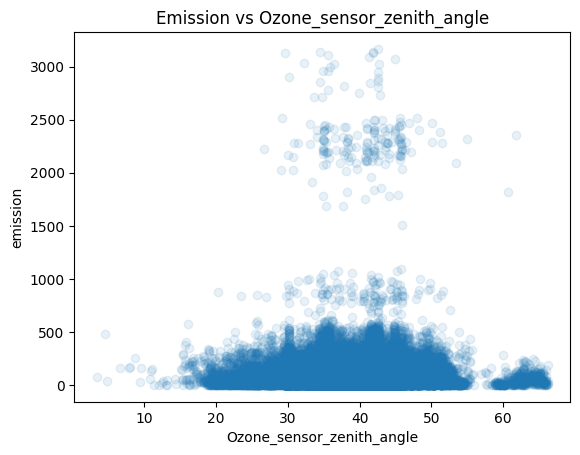

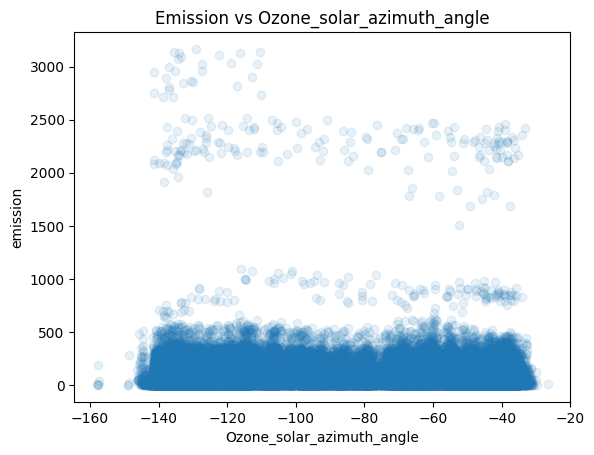

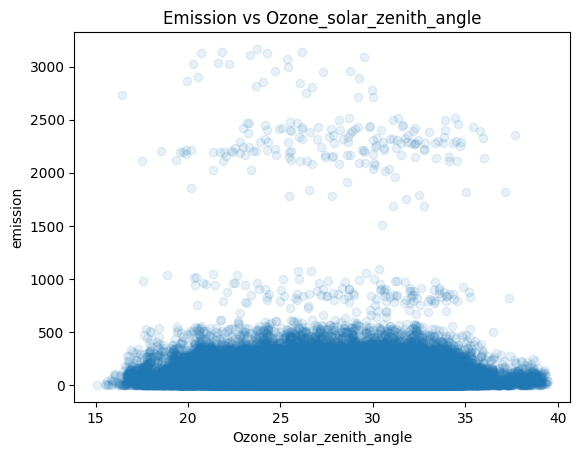

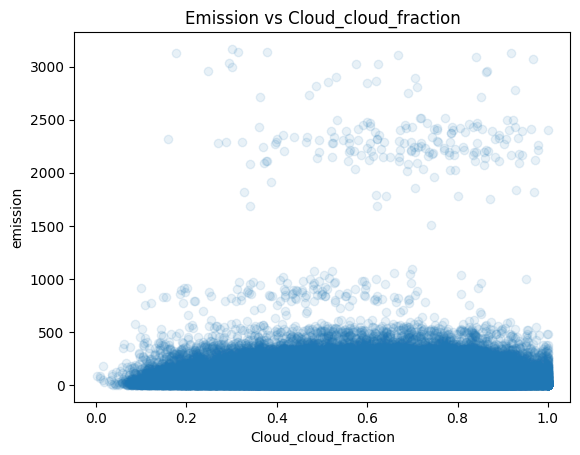

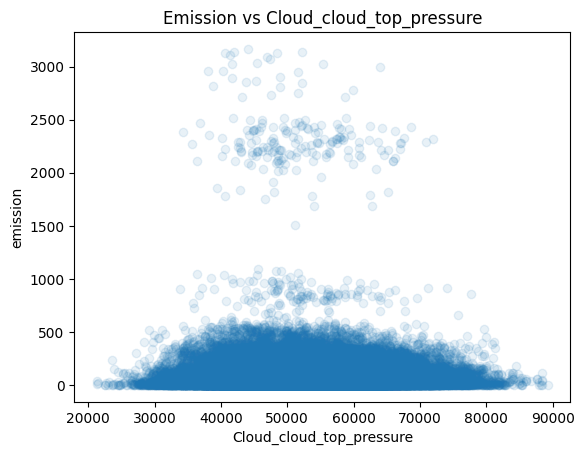

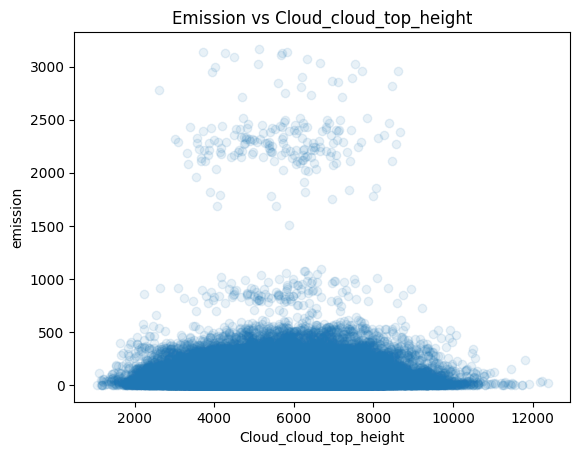

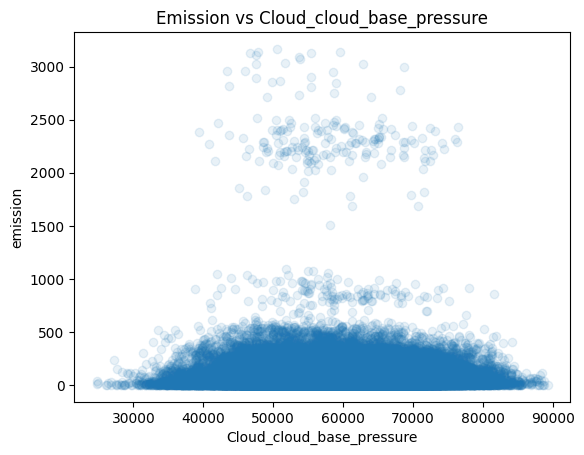

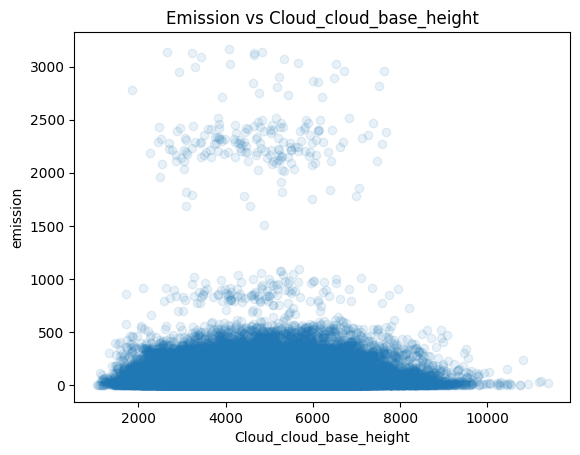

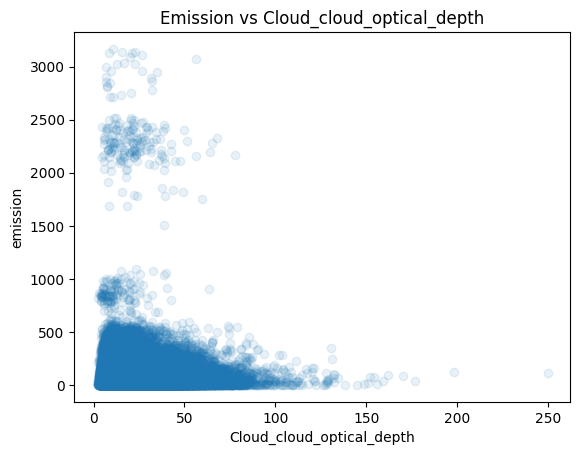

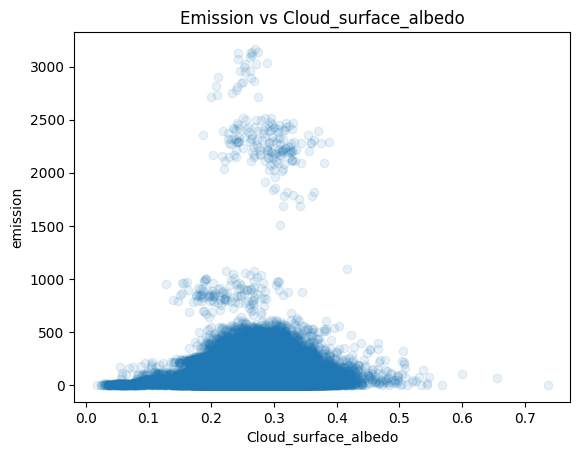

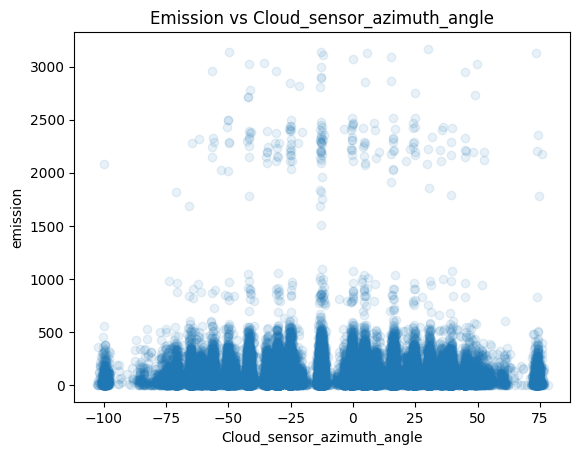

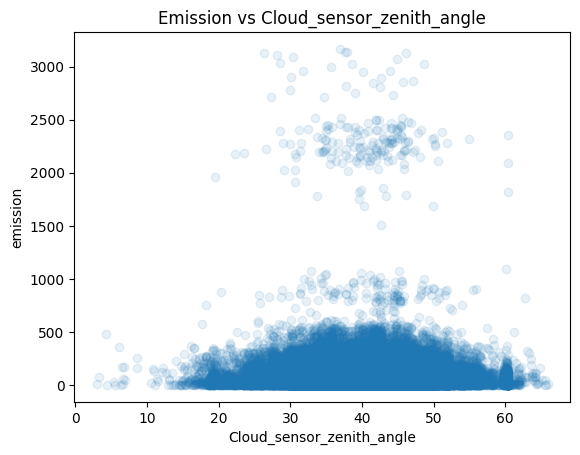

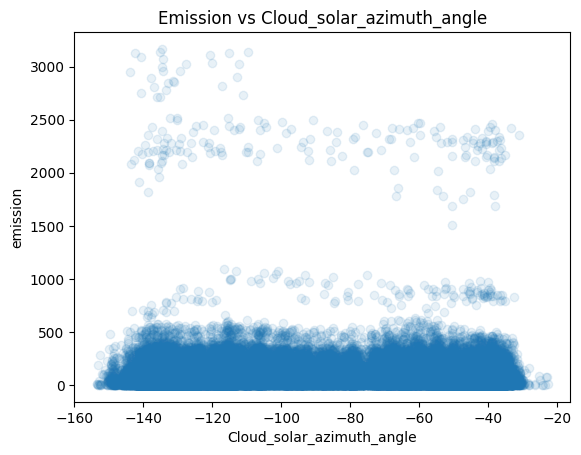

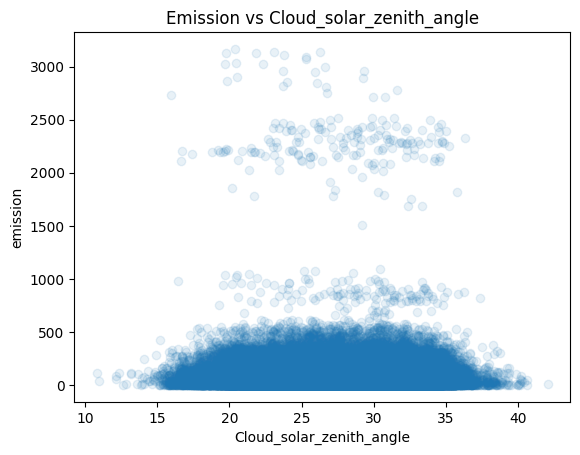

In [11]:
features=['SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf','SulphurDioxide_SO2_slant_column_number_density','SulphurDioxide_cloud_fraction','SulphurDioxide_sensor_azimuth_angle','SulphurDioxide_sensor_zenith_angle','SulphurDioxide_solar_azimuth_angle','SulphurDioxide_solar_zenith_angle','SulphurDioxide_SO2_column_number_density_15km','CarbonMonoxide_CO_column_number_density','CarbonMonoxide_H2O_column_number_density','CarbonMonoxide_cloud_height','CarbonMonoxide_sensor_altitude','CarbonMonoxide_sensor_azimuth_angle','CarbonMonoxide_sensor_zenith_angle','CarbonMonoxide_solar_azimuth_angle','CarbonMonoxide_solar_zenith_angle','NitrogenDioxide_NO2_column_number_density','NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_absorbing_aerosol_index','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle','NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle','Formaldehyde_tropospheric_HCHO_column_number_density','Formaldehyde_tropospheric_HCHO_column_number_density_amf','Formaldehyde_HCHO_slant_column_number_density','Formaldehyde_cloud_fraction','Formaldehyde_solar_zenith_angle','Formaldehyde_solar_azimuth_angle','Formaldehyde_sensor_zenith_angle','Formaldehyde_sensor_azimuth_angle','UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_altitude','UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle','UvAerosolIndex_solar_azimuth_angle','UvAerosolIndex_solar_zenith_angle','Ozone_O3_column_number_density','Ozone_O3_column_number_density_amf','Ozone_O3_slant_column_number_density','Ozone_O3_effective_temperature','Ozone_cloud_fraction','Ozone_sensor_azimuth_angle','Ozone_sensor_zenith_angle','Ozone_solar_azimuth_angle','Ozone_solar_zenith_angle','Cloud_cloud_fraction','Cloud_cloud_top_pressure','Cloud_cloud_top_height','Cloud_cloud_base_pressure','Cloud_cloud_base_height','Cloud_cloud_optical_depth','Cloud_surface_albedo','Cloud_sensor_azimuth_angle','Cloud_sensor_zenith_angle','Cloud_solar_azimuth_angle','Cloud_solar_zenith_angle'] 

for feature in features:
    plt.scatter(x=feature,y='emission',data=train_df,alpha=.1)
    plt.xlabel(feature)
    plt.ylabel('emission')
    plt.title(f'Emission vs {feature}')
    plt.show()

Basing on the plots it seems that the below features have most impact on values of the target:
- Sulphur dioxide SO2 column number density
- Sulphur dioxide SO2 slant column number density
- Sulphur dioxide SO2 column number density 15 km
- Carbon monoxide H2O column number density
- Nitrogen dioxide NO2 column number density
- Nitrogen dioxide tropospheric NO2 column number density
- Nitrogen dioxide absorbing aerosol index
- Formaldehyde tropospheric HCHO column number density
- Formaldehyde HCHO slant column number density amf
- Ozone O3 effective temperature
- Cloud cloud optical depth
- Cloud surface albedo

In [12]:
train_df2=train_df.copy()
train_df2.drop(columns=['SulphurDioxide_SO2_column_number_density_amf','SulphurDioxide_cloud_fraction','SulphurDioxide_sensor_azimuth_angle','SulphurDioxide_sensor_zenith_angle','SulphurDioxide_solar_azimuth_angle','SulphurDioxide_solar_zenith_angle','CarbonMonoxide_CO_column_number_density','CarbonMonoxide_cloud_height','CarbonMonoxide_sensor_altitude','CarbonMonoxide_sensor_azimuth_angle','CarbonMonoxide_sensor_zenith_angle','CarbonMonoxide_solar_azimuth_angle','CarbonMonoxide_solar_zenith_angle','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle','NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle','Formaldehyde_tropospheric_HCHO_column_number_density_amf','Formaldehyde_cloud_fraction','Formaldehyde_solar_zenith_angle','Formaldehyde_solar_azimuth_angle','Formaldehyde_sensor_zenith_angle','Formaldehyde_sensor_azimuth_angle','UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_altitude','UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle','UvAerosolIndex_solar_azimuth_angle','UvAerosolIndex_solar_zenith_angle','Ozone_O3_column_number_density','Ozone_O3_column_number_density_amf','Ozone_O3_slant_column_number_density','Ozone_cloud_fraction','Ozone_sensor_azimuth_angle','Ozone_sensor_zenith_angle','Ozone_solar_azimuth_angle','Ozone_solar_zenith_angle','Cloud_cloud_fraction','Cloud_cloud_top_pressure','Cloud_cloud_top_height','Cloud_cloud_base_pressure','Cloud_cloud_base_height','Cloud_sensor_azimuth_angle','Cloud_sensor_zenith_angle','Cloud_solar_azimuth_angle','Cloud_solar_zenith_angle'],inplace=True)
test_df.drop(columns=['SulphurDioxide_SO2_column_number_density_amf','SulphurDioxide_cloud_fraction','SulphurDioxide_sensor_azimuth_angle','SulphurDioxide_sensor_zenith_angle','SulphurDioxide_solar_azimuth_angle','SulphurDioxide_solar_zenith_angle','CarbonMonoxide_CO_column_number_density','CarbonMonoxide_cloud_height','CarbonMonoxide_sensor_altitude','CarbonMonoxide_sensor_azimuth_angle','CarbonMonoxide_sensor_zenith_angle','CarbonMonoxide_solar_azimuth_angle','CarbonMonoxide_solar_zenith_angle','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle','NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle','Formaldehyde_tropospheric_HCHO_column_number_density_amf','Formaldehyde_cloud_fraction','Formaldehyde_solar_zenith_angle','Formaldehyde_solar_azimuth_angle','Formaldehyde_sensor_zenith_angle','Formaldehyde_sensor_azimuth_angle','UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_altitude','UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle','UvAerosolIndex_solar_azimuth_angle','UvAerosolIndex_solar_zenith_angle','Ozone_O3_column_number_density','Ozone_O3_column_number_density_amf','Ozone_O3_slant_column_number_density','Ozone_cloud_fraction','Ozone_sensor_azimuth_angle','Ozone_sensor_zenith_angle','Ozone_solar_azimuth_angle','Ozone_solar_zenith_angle','Cloud_cloud_fraction','Cloud_cloud_top_pressure','Cloud_cloud_top_height','Cloud_cloud_base_pressure','Cloud_cloud_base_height','Cloud_sensor_azimuth_angle','Cloud_sensor_zenith_angle','Cloud_solar_azimuth_angle','Cloud_solar_zenith_angle'],inplace=True)

In [13]:
a=train_df2.columns.tolist()
print(a)

['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_absorbing_aerosol_index', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo', 'emission']


In [14]:
train_df2.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                          0
latitude                                                      0
longitude                                                     0
year                                                          0
week_no                                                       0
SulphurDioxide_SO2_column_number_density                  14609
SulphurDioxide_SO2_slant_column_number_density            14609
SulphurDioxide_SO2_column_number_density_15km             14609
CarbonMonoxide_H2O_column_number_density                   2122
NitrogenDioxide_NO2_column_number_density                 18320
NitrogenDioxide_tropospheric_NO2_column_number_density    18320
NitrogenDioxide_absorbing_aerosol_index                   18320
Formaldehyde_tropospheric_HCHO_column_number_density       7277
Formaldehyde_HCHO_slant_column_number_density              7277
Ozone_O3_effective_temperature                              548
Cloud_cloud_optical_depth               

In [15]:
test_df.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                         0
latitude                                                     0
longitude                                                    0
year                                                         0
week_no                                                      0
SulphurDioxide_SO2_column_number_density                  6142
SulphurDioxide_SO2_slant_column_number_density            6142
SulphurDioxide_SO2_column_number_density_15km             6142
CarbonMonoxide_H2O_column_number_density                  1337
NitrogenDioxide_NO2_column_number_density                 5655
NitrogenDioxide_tropospheric_NO2_column_number_density    5655
NitrogenDioxide_absorbing_aerosol_index                   5655
Formaldehyde_tropospheric_HCHO_column_number_density      3393
Formaldehyde_HCHO_slant_column_number_density             3393
Ozone_O3_effective_temperature                             147
Cloud_cloud_optical_depth                              

In [16]:
from sklearn import preprocessing
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1000)
le = preprocessing.LabelEncoder()

train_df2['SulphurDioxide_SO2_column_number_density'] = imputer.fit_transform(train_df2[['SulphurDioxide_SO2_column_number_density']]).ravel()
test_df['SulphurDioxide_SO2_column_number_density'] = imputer.transform(test_df[['SulphurDioxide_SO2_column_number_density']]).ravel()
train_df2['SulphurDioxide_SO2_slant_column_number_density'] = imputer.fit_transform(train_df2[['SulphurDioxide_SO2_slant_column_number_density']]).ravel()
test_df['SulphurDioxide_SO2_slant_column_number_density'] = imputer.transform(test_df[['SulphurDioxide_SO2_slant_column_number_density']]).ravel()
train_df2['SulphurDioxide_SO2_column_number_density_15km'] = imputer.fit_transform(train_df2[['SulphurDioxide_SO2_column_number_density_15km']]).ravel()
test_df['SulphurDioxide_SO2_column_number_density_15km'] = imputer.transform(test_df[['SulphurDioxide_SO2_column_number_density_15km']]).ravel()
train_df2['CarbonMonoxide_H2O_column_number_density'] = imputer.fit_transform(train_df2[['CarbonMonoxide_H2O_column_number_density']]).ravel()
test_df['CarbonMonoxide_H2O_column_number_density'] = imputer.transform(test_df[['CarbonMonoxide_H2O_column_number_density']]).ravel()
train_df2['NitrogenDioxide_NO2_column_number_density'] = imputer.fit_transform(train_df2[['NitrogenDioxide_NO2_column_number_density']]).ravel()
test_df['NitrogenDioxide_NO2_column_number_density'] = imputer.transform(test_df[['NitrogenDioxide_NO2_column_number_density']]).ravel()
train_df2['NitrogenDioxide_tropospheric_NO2_column_number_density'] = imputer.fit_transform(train_df2[['NitrogenDioxide_tropospheric_NO2_column_number_density']]).ravel()
test_df['NitrogenDioxide_tropospheric_NO2_column_number_density'] = imputer.transform(test_df[['NitrogenDioxide_tropospheric_NO2_column_number_density']]).ravel()
train_df2['NitrogenDioxide_absorbing_aerosol_index'] = imputer.fit_transform(train_df2[['NitrogenDioxide_absorbing_aerosol_index']]).ravel()
test_df['NitrogenDioxide_absorbing_aerosol_index'] = imputer.transform(test_df[['NitrogenDioxide_absorbing_aerosol_index']]).ravel()

In [17]:
train_df2['Formaldehyde_tropospheric_HCHO_column_number_density'] = imputer.fit_transform(train_df2[['Formaldehyde_tropospheric_HCHO_column_number_density']]).ravel()
test_df['Formaldehyde_tropospheric_HCHO_column_number_density'] = imputer.transform(test_df[['Formaldehyde_tropospheric_HCHO_column_number_density']]).ravel()
train_df2['Formaldehyde_HCHO_slant_column_number_density'] = imputer.fit_transform(train_df2[['Formaldehyde_HCHO_slant_column_number_density']]).ravel()
test_df['Formaldehyde_HCHO_slant_column_number_density'] = imputer.transform(test_df[['Formaldehyde_HCHO_slant_column_number_density']]).ravel()
train_df2['Ozone_O3_effective_temperature'] = imputer.fit_transform(train_df2[['Ozone_O3_effective_temperature']]).ravel()
test_df['Ozone_O3_effective_temperature'] = imputer.transform(test_df[['Ozone_O3_effective_temperature']]).ravel()
train_df2['Cloud_cloud_optical_depth'] = imputer.fit_transform(train_df2[['Cloud_cloud_optical_depth']]).ravel()
test_df['Cloud_cloud_optical_depth'] = imputer.transform(test_df[['Cloud_cloud_optical_depth']]).ravel()
train_df2['Cloud_surface_albedo'] = imputer.fit_transform(train_df2[['Cloud_surface_albedo']]).ravel()
test_df['Cloud_surface_albedo'] = imputer.transform(test_df[['Cloud_surface_albedo']]).ravel()

In [18]:
train_df2.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                      0
latitude                                                  0
longitude                                                 0
year                                                      0
week_no                                                   0
SulphurDioxide_SO2_column_number_density                  0
SulphurDioxide_SO2_slant_column_number_density            0
SulphurDioxide_SO2_column_number_density_15km             0
CarbonMonoxide_H2O_column_number_density                  0
NitrogenDioxide_NO2_column_number_density                 0
NitrogenDioxide_tropospheric_NO2_column_number_density    0
NitrogenDioxide_absorbing_aerosol_index                   0
Formaldehyde_tropospheric_HCHO_column_number_density      0
Formaldehyde_HCHO_slant_column_number_density             0
Ozone_O3_effective_temperature                            0
Cloud_cloud_optical_depth                                 0
Cloud_surface_albedo                    

We imputed the missing data, so let's check how features are correlated with each other.

In [19]:
test_df.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                      0
latitude                                                  0
longitude                                                 0
year                                                      0
week_no                                                   0
SulphurDioxide_SO2_column_number_density                  0
SulphurDioxide_SO2_slant_column_number_density            0
SulphurDioxide_SO2_column_number_density_15km             0
CarbonMonoxide_H2O_column_number_density                  0
NitrogenDioxide_NO2_column_number_density                 0
NitrogenDioxide_tropospheric_NO2_column_number_density    0
NitrogenDioxide_absorbing_aerosol_index                   0
Formaldehyde_tropospheric_HCHO_column_number_density      0
Formaldehyde_HCHO_slant_column_number_density             0
Ozone_O3_effective_temperature                            0
Cloud_cloud_optical_depth                                 0
Cloud_surface_albedo                    

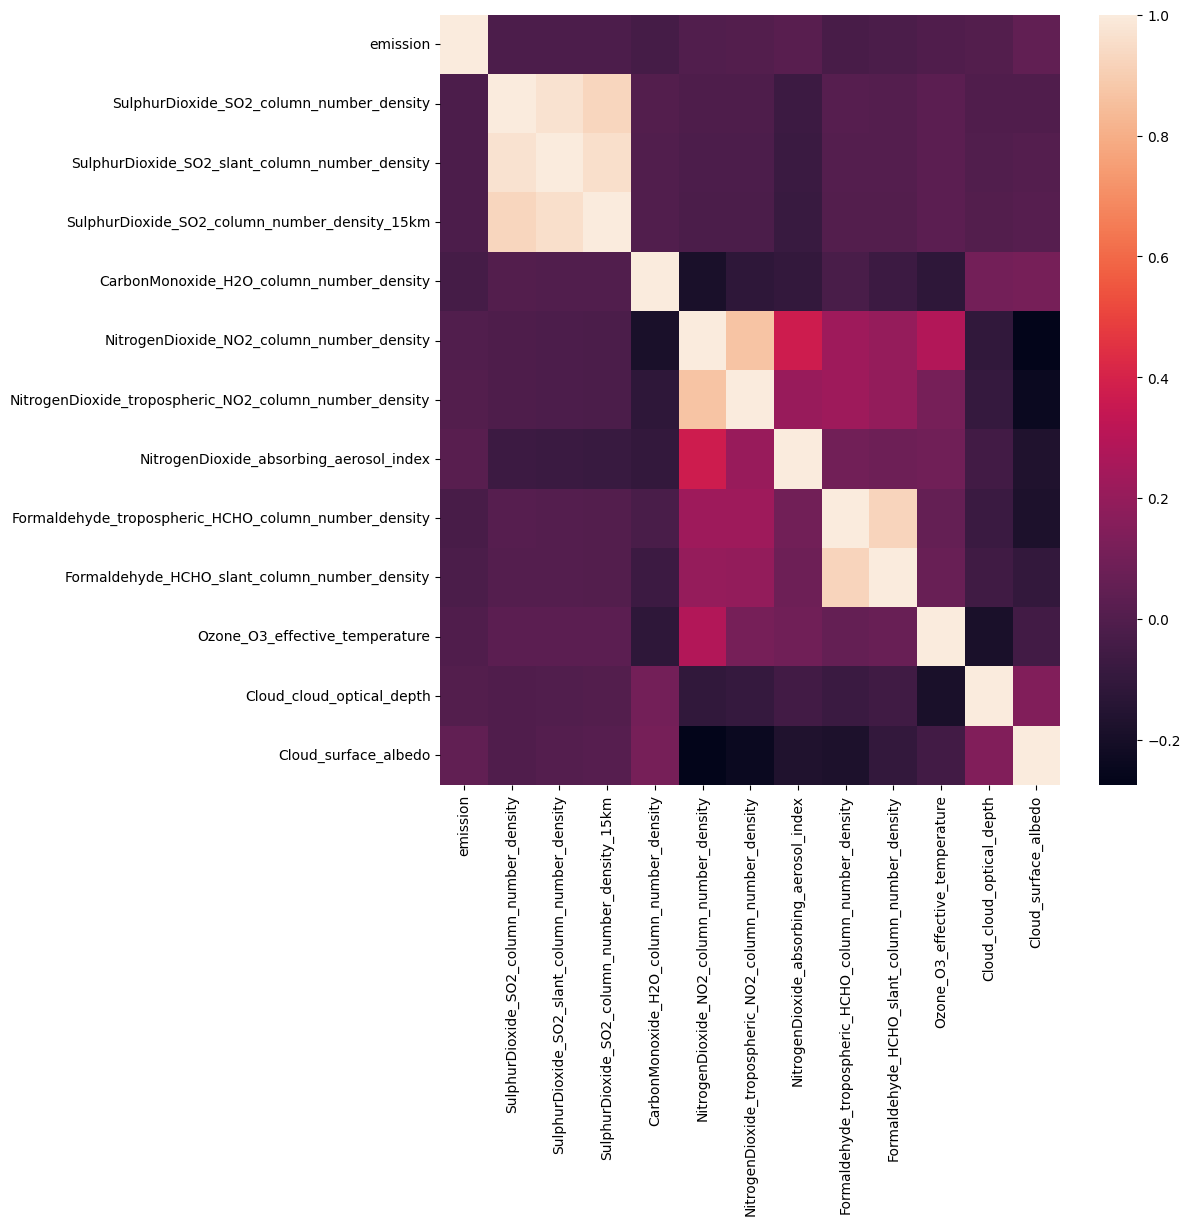

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df2[['emission','SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_absorbing_aerosol_index', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo']].corr())
plt.show()

Looking at the above correlations, let's remove the most correlated features: SulphurDioxide_SO2_column_number_density_15km, NitrogenDioxide_tropospheric_NO2_column_number_density, Formaldehyde_tropospheric_HCHO_column_number_density.

In [21]:
train_df2.drop(columns=['SulphurDioxide_SO2_column_number_density_15km','NitrogenDioxide_tropospheric_NO2_column_number_density','Formaldehyde_tropospheric_HCHO_column_number_density'],inplace=True)
test_df.drop(columns=['SulphurDioxide_SO2_column_number_density_15km','NitrogenDioxide_tropospheric_NO2_column_number_density','Formaldehyde_tropospheric_HCHO_column_number_density'],inplace=True)

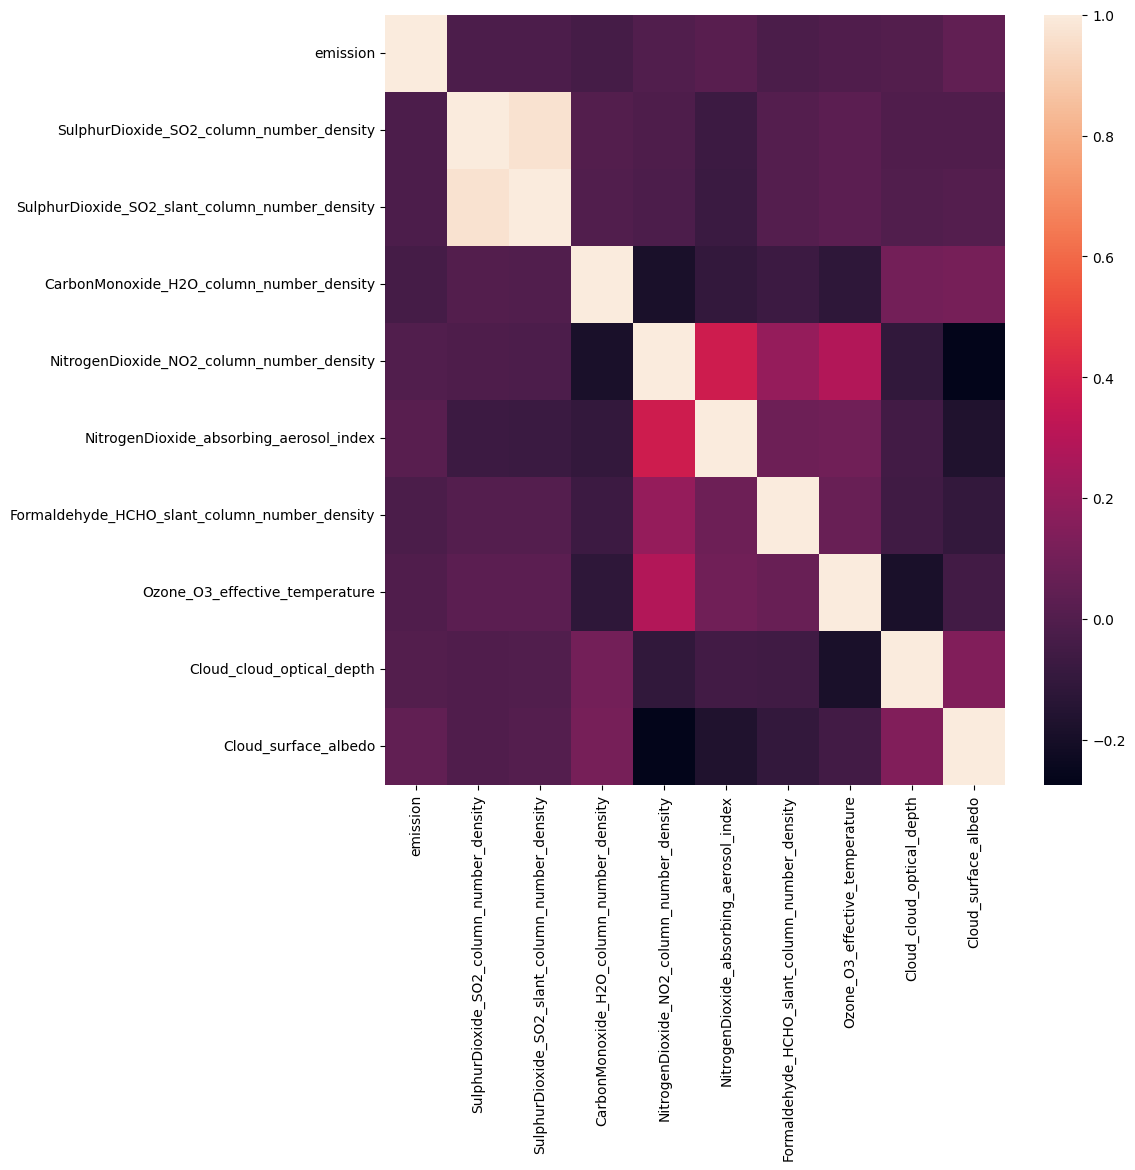

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df2[['emission','SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_absorbing_aerosol_index', 'Formaldehyde_HCHO_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo']].corr())
plt.show()

Let's exclude other features that have little correlation.

In [23]:
train_df2.drop(columns=['SulphurDioxide_SO2_slant_column_number_density','SulphurDioxide_SO2_column_number_density','CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Cloud_cloud_optical_depth'],inplace=True)
test_df.drop(columns=['SulphurDioxide_SO2_slant_column_number_density','SulphurDioxide_SO2_column_number_density','CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Cloud_cloud_optical_depth'],inplace=True)

In [24]:
filter=train_df2[train_df2['emission']>1500]
filter

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
46587  ID_-2.079_29.321_2019_00    -2.079     29.321  2019        0   
46588  ID_-2.079_29.321_2019_01    -2.079     29.321  2019        1   
46589  ID_-2.079_29.321_2019_02    -2.079     29.321  2019        2   
46590  ID_-2.079_29.321_2019_03    -2.079     29.321  2019        3   
46591  ID_-2.079_29.321_2019_04    -2.079     29.321  2019        4   
46592  ID_-2.079_29.321_2019_05    -2.079     29.321  2019        5   
46593  ID_-2.079_29.321_2019_06    -2.079     29.321  2019        6   
46594  ID_-2.079_29.321_2019_07    -2.079     29.321  2019        7   
46595  ID_-2.079_29.321_2019_08    -2.079     29.321  2019        8   
46640  ID_-2.079_29.321_2020_00    -2.079     29.321  2020        0   
46641  ID_-2.079_29.321_2020_01    -2.079     29.321  2020        1   
46642  ID_-2.079_29.321_2020_02    -2.079     29.321  2020        2   
46643  ID_-2.079_29.321_2020_03    -2.079     29.321  2020        3   
46644  ID_-2.079_29.321_2020_04    -2.079     29.321  2020        4   
46645  ID_-2.079_29.321_2020_05    -2.079     29.321  2020        5   
46646  ID_-2.079_29.321_2020_06    -2.079     29.321  2020        6   
46647  ID_-2.079_29.321_2020_07    -2.079     29.321  2020        7   
46648  ID_-2.079_29.321_2020_08    -2.079     29.321  2020        8   
46693  ID_-2.079_29.321_2021_00    -2.079     29.321  2021        0   
46694  ID_-2.079_29.321_2021_01    -2.079     29.321  2021        1   
46695  ID_-2.079_29.321_2021_02    -2.079     29.321  2021        2   
46696  ID_-2.079_29.321_2021_03    -2.079     29.321  2021        3   
46697  ID_-2.079_29.321_2021_04    -2.079     29.321  2021        4   
46698  ID_-2.079_29.321_2021_05    -2.079     29.321  2021        5   
46699  ID_-2.079_29.321_2021_06    -2.079     29.321  2021        6   
46700  ID_-2.079_29.321_2021_07    -2.079     29.321  2021        7   
46701  ID_-2.079_29.321_2021_08    -2.079     29.321  2021        8   
46702  ID_-2.079_29.321_2021_09    -2.079     29.321  2021        9   
56763  ID_-2.378_29.222_2019_00    -2.378     29.222  2019        0   
56764  ID_-2.378_29.222_2019_01    -2.378     29.222  2019        1   
56765  ID_-2.378_29.222_2019_02    -2.378     29.222  2019        2   
56766  ID_-2.378_29.222_2019_03    -2.378     29.222  2019        3   
56767  ID_-2.378_29.222_2019_04    -2.378     29.222  2019        4   
56768  ID_-2.378_29.222_2019_05    -2.378     29.222  2019        5   
56769  ID_-2.378_29.222_2019_06    -2.378     29.222  2019        6   
56770  ID_-2.378_29.222_2019_07    -2.378     29.222  2019        7   
56771  ID_-2.378_29.222_2019_08    -2.378     29.222  2019        8   
56772  ID_-2.378_29.222_2019_09    -2.378     29.222  2019        9   
56773  ID_-2.378_29.222_2019_10    -2.378     29.222  2019       10   
56774  ID_-2.378_29.222_2019_11    -2.378     29.222  2019       11   
56775  ID_-2.378_29.222_2019_12    -2.378     29.222  2019       12   
56776  ID_-2.378_29.222_2019_13    -2.378     29.222  2019       13   
56777  ID_-2.378_29.222_2019_14    -2.378     29.222  2019       14   
56778  ID_-2.378_29.222_2019_15    -2.378     29.222  2019       15   
56779  ID_-2.378_29.222_2019_16    -2.378     29.222  2019       16   
56780  ID_-2.378_29.222_2019_17    -2.378     29.222  2019       17   
56781  ID_-2.378_29.222_2019_18    -2.378     29.222  2019       18   
56782  ID_-2.378_29.222_2019_19    -2.378     29.222  2019       19   
56783  ID_-2.378_29.222_2019_20    -2.378     29.222  2019       20   
56784  ID_-2.378_29.222_2019_21    -2.378     29.222  2019       21   
56785  ID_-2.378_29.222_2019_22    -2.378     29.222  2019       22   
56786  ID_-2.378_29.222_2019_23    -2.378     29.222  2019       23   
56787  ID_-2.378_29.222_2019_24    -2.378     29.222  2019       24   
56788  ID_-2.378_29.222_2019_25    -2.378     29.222  2019       25   
56789  ID_-2.378_29.222_2019_26    -2.378     29.222  2019       26   
56790  ID_-2.378_29.222_2019_27    

In [25]:
filter_2=train_df2[train_df2['emission']>2500]
filter_2

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
46587  ID_-2.079_29.321_2019_00    -2.079     29.321  2019        0   
46588  ID_-2.079_29.321_2019_01    -2.079     29.321  2019        1   
46589  ID_-2.079_29.321_2019_02    -2.079     29.321  2019        2   
46590  ID_-2.079_29.321_2019_03    -2.079     29.321  2019        3   
46591  ID_-2.079_29.321_2019_04    -2.079     29.321  2019        4   
46592  ID_-2.079_29.321_2019_05    -2.079     29.321  2019        5   
46593  ID_-2.079_29.321_2019_06    -2.079     29.321  2019        6   
46594  ID_-2.079_29.321_2019_07    -2.079     29.321  2019        7   
46595  ID_-2.079_29.321_2019_08    -2.079     29.321  2019        8   
46640  ID_-2.079_29.321_2020_00    -2.079     29.321  2020        0   
46641  ID_-2.079_29.321_2020_01    -2.079     29.321  2020        1   
46642  ID_-2.079_29.321_2020_02    -2.079     29.321  2020        2   
46643  ID_-2.079_29.321_2020_03    -2.079     29.321  2020        3   
46644  ID_-2.079_29.321_2020_04    -2.079     29.321  2020        4   
46645  ID_-2.079_29.321_2020_05    -2.079     29.321  2020        5   
46646  ID_-2.079_29.321_2020_06    -2.079     29.321  2020        6   
46647  ID_-2.079_29.321_2020_07    -2.079     29.321  2020        7   
46648  ID_-2.079_29.321_2020_08    -2.079     29.321  2020        8   
46694  ID_-2.079_29.321_2021_01    -2.079     29.321  2021        1   
46695  ID_-2.079_29.321_2021_02    -2.079     29.321  2021        2   
46696  ID_-2.079_29.321_2021_03    -2.079     29.321  2021        3   
46697  ID_-2.079_29.321_2021_04    -2.079     29.321  2021        4   
46698  ID_-2.079_29.321_2021_05    -2.079     29.321  2021        5   
46699  ID_-2.079_29.321_2021_06    -2.079     29.321  2021        6   
46700  ID_-2.079_29.321_2021_07    -2.079     29.321  2021        7   
46701  ID_-2.079_29.321_2021_08    -2.079     29.321  2021        8   
46702  ID_-2.079_29.321_2021_09    -2.079     29.321  2021        9   
56912  ID_-2.378_29.222_2021_43    -2.378     29.222  2021       43   
56916  ID_-2.378_29.222_2021_47    -2.378     29.222  2021       47   
56917  ID_-2.378_29.222_2021_48    -2.378     29.222  2021       48   

       NitrogenDioxide_absorbing_aerosol_index  Cloud_surface_albedo  \
46587                                -1.812155              0.239269   
46588                                -1.812155              0.253798   
46589                                -1.267480              0.261905   
46590                                -1.379411              0.265051   
46591                                -2.002035              0.261588   
46592                                -1.592434              0.269940   
46593                                -2.027591              0.264941   
46594                                -1.812155              0.242241   
46595                                -1.190332              0.274204   
46640                                -1.718645              0.273905   
46641                                -1.812155              0.262828   
46642                                -2.252496              0.261604   
46643                                -2.046903              0.252412   
46644                                -1.812155              0.243270   
46645                                -1.847642              0.245003   
46646                                -1.522637              0.253033   
46647                                -1.804855              0.289551   
46648                                -1.708650              0.271516   
46694                                -1.953307              0.199566   
46695                                -3.182194              0.232858   
46696                                -1.388316              0.240757   
46697                                -2.063303              0.248100   
46698                                -2.407899              0.249890   
46699                                -2.624864              0.267657   
46700    

Above we filtered the instances that have emission values over 1500 and 2500, because those are outliers in our data. We have 187 instances with emission value over 1500 and 30 with value over 2500. These high values occur only for two locations, that are represented in total by 318 instances. We will remove the all the instances with emission values over 1500.

In [26]:
filter_drop=train_df2[train_df2['emission']>1500].index
train_df2.drop(filter_drop,inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler
s_scaler=StandardScaler()
train_df2['latitude_normalized']=s_scaler.fit_transform(train_df2[['latitude']])
test_df['latitude_normalized']=s_scaler.transform(test_df[['latitude']])
train_df2['longitude_normalized']=s_scaler.fit_transform(train_df2[['longitude']])
test_df['longitude_normalized']=s_scaler.transform(test_df[['longitude']])
train_df2['week_no_normalized']=s_scaler.fit_transform(train_df2[['week_no']])
test_df['week_no_normalized']=s_scaler.transform(test_df[['week_no']])
train_df2['NitrogenDioxide_absorbing_aerosol_index_norm']=s_scaler.fit_transform(train_df2[['NitrogenDioxide_absorbing_aerosol_index']])
test_df['NitrogenDioxide_absorbing_aerosol_index_norm']=s_scaler.transform(test_df[['NitrogenDioxide_absorbing_aerosol_index']])
train_df2['Cloud_surface_albedo_norm']=s_scaler.fit_transform(train_df2[['Cloud_surface_albedo']])
test_df['Cloud_surface_albedo_norm']=s_scaler.transform(test_df[['Cloud_surface_albedo']])

In [28]:
train_df2.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   NitrogenDioxide_absorbing_aerosol_index  Cloud_surface_albedo  emission  \
0                                -1.812155              0.272292  3.750994   
1                                -1.935386              0.256830  4.025176   
2                                -2.754374              0.251101  4.231381   
3                                -1.812155              0.262043  4.305286   
4                                -1.450563              0.235847  4.347317   

   latitude_normalized  longitude_normalized  week_no_normalized  \
0             1.985682             -0.729819           -1.700502   
1             1.985682             -0.729819           -1.635118   
2             1.985682             -0.729819           -1.569733   
3             1.985682             -0.729819           -1.504349   
4             1.985682             -0.729819           -1.438964   

   NitrogenDioxide_absorbing_aerosol_index_norm  Cloud_surface_albedo_norm  
0                                      0.000355                   0.017567  
1                                     -0.204204                  -0.296068  
2                                     -1.563688                  -0.412283  
3                                      0.000355                  -0.190336  
4                                      0.600583                  -0.721713

In [29]:
train_df2.drop(columns=['Cloud_surface_albedo','NitrogenDioxide_absorbing_aerosol_index'],inplace=True)
test_df.drop(columns=['Cloud_surface_albedo','NitrogenDioxide_absorbing_aerosol_index'],inplace=True)

In [30]:
train_df2.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  emission  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0  3.750994   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1  4.025176   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2  4.231381   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3  4.305286   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4  4.347317   

   latitude_normalized  longitude_normalized  week_no_normalized  \
0             1.985682             -0.729819           -1.700502   
1             1.985682             -0.729819           -1.635118   
2             1.985682             -0.729819           -1.569733   
3             1.985682             -0.729819           -1.504349   
4             1.985682             -0.729819           -1.438964   

   NitrogenDioxide_absorbing_aerosol_index_norm  Cloud_surface_albedo_norm  
0                                      0.000355                   0.017567  
1                                     -0.204204                  -0.296068  
2                                     -1.563688                  -0.412283  
3                                      0.000355                  -0.190336  
4                                      0.600583                  -0.721713

In [31]:
test_df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   latitude_normalized  longitude_normalized  week_no_normalized  \
0             1.985682             -0.729819           -1.700502   
1             1.985682             -0.729819           -1.635118   
2             1.985682             -0.729819           -1.569733   
3             1.985682             -0.729819           -1.504349   
4             1.985682             -0.729819           -1.438964   

   NitrogenDioxide_absorbing_aerosol_index_norm  Cloud_surface_albedo_norm  
0                                      0.000355                  -0.621793  
1                                      0.657442                   0.440050  
2                                      2.995004                  -0.087142  
3                                      0.884488                   0.674552  
4                                      0.000355                   0.259556

In [32]:
train_df2.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      78836  78836.000000  78836.000000  78836.000000   
unique                     78836           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.890024     29.881681   2019.999987   
std                          NaN      0.694992      0.810727      0.816499   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.466000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.890000   2020.000000   
75%                          NaN     -1.299000     30.474000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no      emission  latitude_normalized  longitude_normalized  \
count   78836.000000  78836.000000         7.883600e+04          7.883600e+04   
unique           NaN           NaN                  NaN                   NaN   
top              NaN           NaN                  NaN                   NaN   
freq             NaN           NaN                  NaN                   NaN   
mean       26.007750     76.591042        -2.076577e-16          3.677272e-15   
std        15.294257     92.495043         1.000006e+00          1.000006e+00   
min         0.000000      0.000000        -2.027341e+00         -2.039762e+00   
25%        13.000000      9.740085        -8.287581e-01         -7.643565e-01   
50%        26.000000     45.436613         1.154500e-02          1.026132e-02   
75%        39.000000    109.014014         8.504093e-01          7.306066e-01   
max        52.000000   1087.879600         1.985682e+00          2.035616e+00   

        week_no_normalized  NitrogenDioxide_absorbing_aerosol_index_norm  \
count         7.883600e+04                                  7.883600e+04   
unique                 NaN                                           NaN   
top                    NaN                                           NaN   
freq                   NaN                                           NaN   
mean         -1.095521e-16                                  2.249625e-16   
std           1.000006e+00                                  1.000006e+00   
min          -1.700502e+00                                 -4.633443e+00   
25%          -8.505044e-01                                 -5.291987e-01   
50%          -5.067468e-04                                  3.548218e-04   
75%           8.494909e-01                                  3.889353e-01   
max           1.699489e+00                                  5.286202e+00   

        Cloud_surface_albedo_norm  
count                7.883600e+04  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                -5.580801e-16  
std                  1.000006e+00  
min                 -5.146887e+00  
25%                 -6.036243e-01  
50%                  1.935159e-02  
75%                  6.331853e-01  
max                  9.434318e+00

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import math
from math import sqrt

X = train_df2.drop(['ID_LAT_LON_YEAR_WEEK','emission'],axis=1)
y = train_df2['emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

pipeline=make_pipeline(PolynomialFeatures(),ExtraTreesRegressor())
degrees={'polynomialfeatures__degree':[1,2,3]}
parameter_search=GridSearchCV(pipeline,degrees,scoring='neg_mean_squared_error')
parameter_search.fit(X_train, y_train)
print("The best parameters are:", parameter_search.best_params_)
model=parameter_search.best_estimator_
y_predict_test=model.predict(X_test)
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predict_test))}')


The best parameters are: {'polynomialfeatures__degree': 3}
Test RMSE: 116.27019337018638


In [35]:
Xtest=test_df.drop(['ID_LAT_LON_YEAR_WEEK'],axis=1)
ytest=test_df['ID_LAT_LON_YEAR_WEEK']
y_pred=model.predict(Xtest)

submission = pd.DataFrame({"ID_LAT_LON_YEAR_WEEK": test_df['ID_LAT_LON_YEAR_WEEK'],"emission":y_pred})

submission.to_csv('C:/Users/pfali/Downloads/playground-series-s3e20/submission.csv', index=False)